<a href="https://colab.research.google.com/github/gopessoa/RockPaperScissor/blob/main/RPS_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rock Paper Scissor identification neural network

## Seting Database

### Importando a database

In [37]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-06-23 19:21:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 142.250.81.208, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   257MB/s    in 0.7s    

2021-06-23 19:21:01 (257 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-06-23 19:21:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

### Descompactando os arquivos

In [38]:
import os
import zipfile
import tensorflow as tf

In [39]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [40]:
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

### Training database

In [41]:
training_dir = "/tmp/rps/"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)


In [42]:
training_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


### Testing database

In [43]:
testing_dir = "/tmp/rps-test-set/"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

In [44]:
testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.


## Setting Neural Network and Training the model

### Neural Network

In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [46]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [47]:
history = model.fit_generator(training_generator, epochs=25,
                              validation_data = testing_generator,
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
79/79 [==============================] - 10s 124ms/step - loss: 0.7423 - accuracy: 0.7028 - val_loss: 0.4495 - val_accuracy: 0.8495
Epoch 2/25
79/79 [==============================] - 9s 119ms/step - loss: 0.0943 - accuracy: 0.9679 - val_loss: 0.4301 - val_accuracy: 0.8978
Epoch 3/25
79/79 [==============================] - 9s 119ms/step - loss: 0.2121 - accuracy: 0.9817 - val_loss: 0.6757 - val_accuracy: 0.8790
Epoch 4/25
79/79 [==============================] - 9s 120ms/step - loss: 0.0241 - accuracy: 0.9937 - val_loss: 0.3317 - val_accuracy: 0.9409
Epoch 5/25
79/79 [==============================] - 10s 120ms/step - loss: 8.9415e-05 - accuracy: 1.0000 - val_loss: 0.8495 - val_accuracy: 0.8925
Epoch 6/25
79/79 [==============================] - 10s 120ms/step - loss: 0.0864 - accuracy: 0.9940 - val_loss: 0.8743 - val_accuracy: 0.7984
Epoch 7/25
79/79 [==============================] - 9s 118ms/step - loss: 9.3165e-04 - accuracy: 0.9996 - val_loss: 0.9152 - val_accuracy: 0.

In [48]:
classes = model.predict(testing_generator, batch_size=10)

In [49]:
classes

array([[5.8247999e-27, 6.7703894e-13, 1.0000000e+00],
       [2.2385631e-33, 1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00],
       ...,
       [6.4801488e-16, 1.0084381e-17, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.3694809e-29],
       [1.0000000e+00, 0.0000000e+00, 5.7863212e-38]], dtype=float32)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

In [65]:
# import files to test my nt
uploaded = files.upload()

Saving tesouraescondidinha2.jpg to tesouraescondidinha2 (2).jpg


[[0. 0. 1.]]


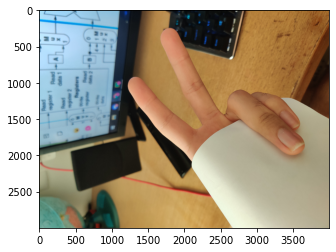

In [66]:
for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    plt.imshow(plt.imread(fn))
    print(classes)